In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('/content/taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [6]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [8]:
def detect_outliers(df):

    threshold = 3
    outliers = {}

    # Iterate through each column in the DataFrame
    for i in df.select_dtypes(include=[np.number]).columns:
        mean = np.mean(df[i])
        std = np.std(df[i])

        # Calculate Z-scores for the column
        z_scores = (df[i] - mean) / std

        # Identify outliers
        outliers[i] = df[i][np.abs(z_scores) > threshold].tolist()

    return outliers


In [9]:
outlier_pt = detect_outliers(df)

In [10]:
outlier_pt

{'Trip_Distance_km': [105.94355003672597,
  138.09832791310237,
  146.0670471598387,
  112.8309582902826,
  102.74755620694734,
  109.61608204688008,
  130.80900130744172,
  116.196063616616,
  139.06223019422194,
  100.38042000901908,
  145.74705994904548,
  116.66768073006573,
  104.37179088913676,
  107.78683195771164,
  139.476514583775,
  122.82019097975328,
  138.76388715029725,
  101.0397035425727,
  108.14699381139414,
  126.54762829842768],
 'Passenger_Count': [],
 'Base_Fare': [],
 'Per_Km_Rate': [],
 'Per_Minute_Rate': [],
 'Trip_Duration_Minutes': [],
 'Trip_Price': [201.869509186128,
  280.87730155406564,
  320.958663578238,
  233.00828520738887,
  274.53508679715014,
  327.21766546350466,
  328.8717691378544,
  206.69956969976877,
  276.84059674137075,
  329.9130039401465,
  325.0989498083767,
  248.29520891209057,
  206.50865196831717,
  322.7259960920446,
  296.0886973121837,
  247.5983178992313,
  332.0436886774302,
  283.6452005933156,
  239.17140732641303,
  224.9146

## **Analysis on Trip_Distance_km**


*   Filling Null values






In [11]:
df_Trip_Distance = df['Trip_Distance_km']
df_Trip_Distance

,Trip_Distance_km
0,19.35
1,47.59
2,36.87
3,30.33
4,NaN
...,...
995,5.49
996,45.95
997,7.70
998,47.56


In [12]:
df_Trip_Distance.isnull()

,Trip_Distance_km
0,False
1,False
2,False
3,False
4,True
...,...
995,False
996,False
997,False
998,False


In [13]:
df_Trip_Distance.shape

(1000,)

In [14]:

df_Trip_Distance.quantile(0.20)

9.687999999999999

In [15]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True)


In [16]:
df['Trip_Distance_km']

,Trip_Distance_km
0,19.35
1,47.59
2,36.87
3,30.33
4,25.83
...,...
995,5.49
996,45.95
997,7.70
998,47.56




*   Outliers in Data by using Box Plot




<Axes: ylabel='Trip_Distance_km'>

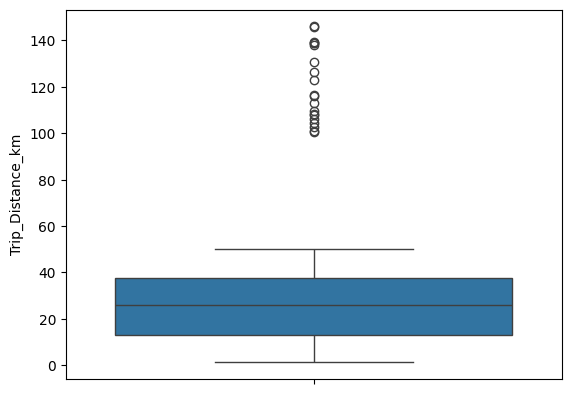

In [17]:

sns.boxplot(y=df['Trip_Distance_km'])




*  Treating Outliers




In [18]:
# Calculate Q1, Q3, and IQR for Trip_distance_km
Q1 = df['Trip_Distance_km'].quantile(0.25)
Q3 = df['Trip_Distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
median = df['Trip_Distance_km'].median()
df['Trip_Distance_km'] = df['Trip_Distance_km'].apply(
    lambda x: median if x < lower_bound or x > upper_bound else x
)


<Axes: ylabel='Trip_Distance_km'>

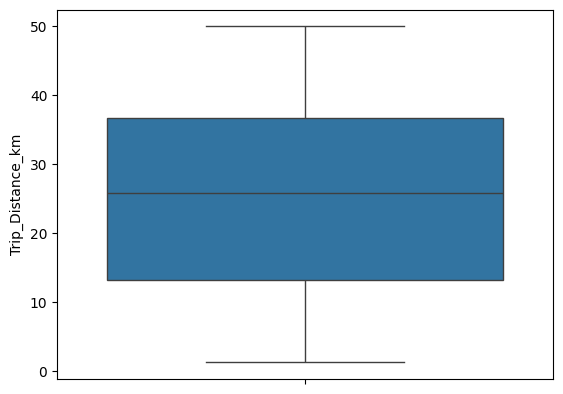

In [19]:
sns.boxplot(y=df['Trip_Distance_km'])

# **Analysis on Trip_Price**


*  Filling Null values








In [20]:
df['Trip_Price'].isnull()

,Trip_Price
0,False
1,True
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [21]:
df['Trip_Price'].count()


951

In [22]:
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)

In [23]:
df['Trip_Price']

,Trip_Price
0,36.2624
1,50.0745
2,52.9032
3,36.4698
4,15.6180
...,...
995,34.4049
996,62.1295
997,33.1236
998,61.2090


*   Outliers in Data by using Box Plot



<Axes: ylabel='Trip_Price'>

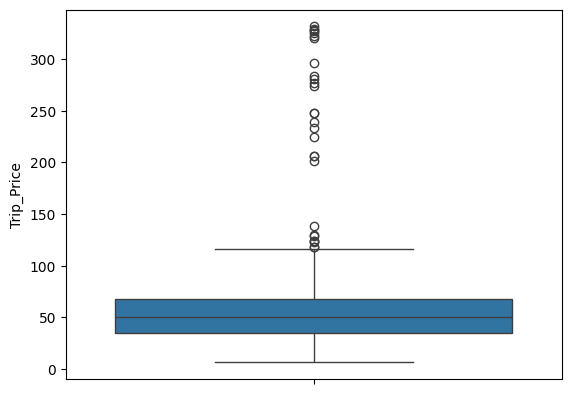

In [24]:
sns.boxplot(y=df['Trip_Price'])

In [25]:
# Calculate the median for Trip_price
median_price = df['Trip_Price'].median()

# Calculate Q1, Q3, and IQR for Trip_price
Q1_price = df['Trip_Price'].quantile(0.25)
Q3_price = df['Trip_Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate lower and upper bounds for outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Replace outliers in Trip_price with the median
df['Trip_Price'] = df['Trip_Price'].apply(
    lambda x: median_price if x < lower_bound_price or x > upper_bound_price else x
)


<Axes: ylabel='Trip_Price'>

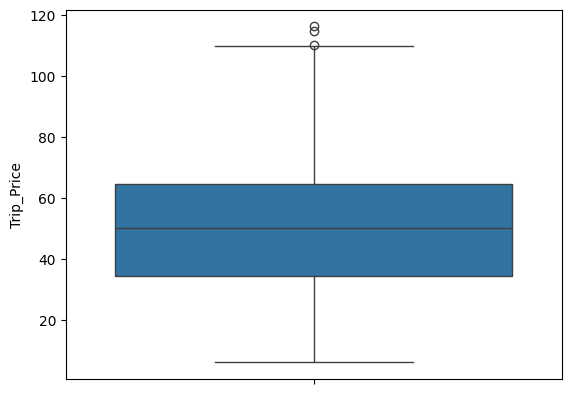

In [26]:
sns.boxplot(y=df['Trip_Price'])

In [27]:
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test,y_pred)

In [33]:
mse

284.5085447829987

In [34]:
np.sqrt(mse)

16.86738108844994

In [35]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [1.07793375]
Intercept: 24.574725457640145


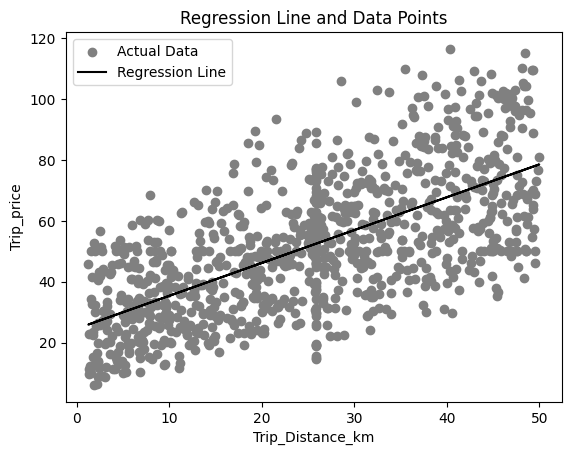

In [36]:
# Scatterplot of actual data
plt.scatter(X, y, color='grey', label='Actual Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='black', label='Regression Line')

# Labels and title
plt.xlabel('Trip_Distance_km')
plt.ylabel('Trip_price')
plt.title('Regression Line and Data Points')
plt.legend()
plt.show()
